<a href="https://colab.research.google.com/github/Rohan5076/machine-learning/blob/main/spamextra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np 
import pandas as pd 
import seaborn as sn
import re
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator




In [22]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#loading the data set
df =pd.read_excel ("/content/drive/MyDrive/All CSV files-20220711T101939Z-001/All CSV files/spam.xlsx")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
df.shape

(5572, 5)

In [26]:
df.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    647  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [27]:
df['v2'] = df["v2"].map(str)

In [28]:
df['v3'] = df['v2'].apply(lambda x: len(x.split(' ')))
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,v3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13


In [29]:
max(df['v3'])

171

In [30]:
df1=df[['v1','v2','v3']]
df1.columns=['Target','message','message_len']
df1.head()

,Target,message,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [31]:
balance_counts = df1.groupby('Target')['Target'].agg('count').values
balance_counts

array([4825,  747])

In [32]:
df1.isna().sum()

Target         0
message        0
message_len    0
dtype: int64

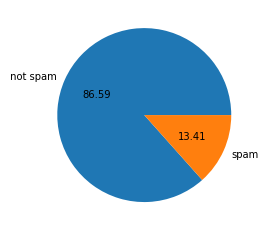

In [35]:
plt.pie(df1['Target'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [36]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['ham'],
    y=[balance_counts[0]],
    name='ham',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['spam'],
    y=[balance_counts[1]],
    name='spam',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by target</span>'
)
fig.show()

In [37]:
ham_df = df1[df1['Target'] == 'ham']['message_len'].value_counts().sort_index()
spam_df = df1[df1['Target'] == 'spam']['message_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ham_df.index,
    y=ham_df.values,
    name='ham',
    fill='tozeroy',
    marker_color=primary_blue,
))
fig.add_trace(go.Scatter(
    x=spam_df.index,
    y=spam_df.values,
    name='spam',
    fill='tozeroy',
    marker_color=primary_grey,
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Data Roles in Different Fields</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

In [39]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['Target']==0]['num_characters'],color='green')
sns.histplot(df1[df1['Target']==1]['num_characters'],color = 'red')

KeyError: ignored

<Figure size 864x432 with 0 Axes>

In [41]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
df1.head(5)

,Target,message,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [43]:
df=df1

In [49]:
df.columns

Index(['Target', 'message', 'message_len'], dtype='object')

In [51]:
df.rename(columns = {'Target':'message_type', 'message':'message', 'message_len':'num_words'}, inplace = True)

In [52]:
df.head(5)

,message_type,message,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [53]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_words,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61


In [55]:
from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, 蘝, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5572, dtype: object

In [57]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [64]:
df1[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,79.971823,15.580761,1.972182
std,59.619145,11.419881,1.420084
min,2.000000,1.000000,1.000000
25%,35.000000,7.000000,1.000000
50%,61.000000,12.000000,1.000000
75%,121.000000,23.000000,2.000000
max,910.000000,171.000000,28.000000


In [62]:
df1[df1['message_type']=="ham"][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,70.927461,14.298238,1.808705
std,58.001173,11.536964,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,92.000000,19.000000,2.000000
max,910.000000,171.000000,28.000000


In [63]:
df1[df1['message_type']=="spam"][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.390897,23.864793,3.028112
std,29.041107,5.818219,1.537036
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,223.000000,35.000000,8.000000


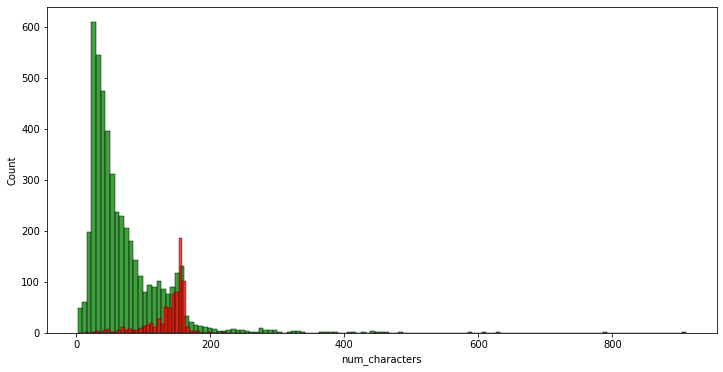

In [67]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['message_type']=="ham"]['num_characters'],color='green')
sns.histplot(df1[df1['message_type']=="spam"]['num_characters'],color = 'red')

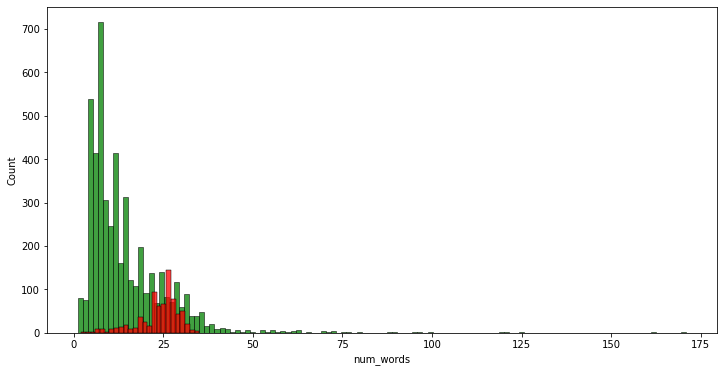

In [68]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['message_type']=="ham"]['num_words'],color='green')
sns.histplot(df1[df1['message_type']=="spam"]['num_words'],color='red')

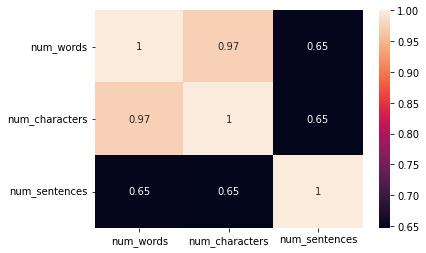

In [70]:
#plotting a heatmap for the correlation
sns.heatmap(df1.corr(),annot=True)

In [82]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [83]:
df1['message_clean'] = df1['message'].apply(clean_text)
df1.head()

,message_type,message,num_words,num_characters,num_sentences,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,2,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,6,29,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,2,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,11,49,1,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,1,nah i dont think he goes to usf he lives aroun...


In [84]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [85]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df1['message_clean'] = df1['message_clean'].apply(remove_stopwords)
df1.head()

,message_type,message,num_words,num_characters,num_sentences,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,2,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,6,29,2,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,2,free entry wkly comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,11,49,1,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,1,nah dont think goes usf lives around though


In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df1['message_type'])

df1['target_encoded'] = le.transform(df1['message_type'])
df1.head()

,message_type,message,num_words,num_characters,num_sentences,message_clean,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,2,go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,6,29,2,ok lar joking wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,2,free entry wkly comp win fa cup final tkts m...,1
3,ham,U dun say so early hor... U c already then say...,11,49,1,dun say early hor already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,1,nah dont think goes usf lives around though,0


In [87]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
x = df1['message_clean']
y = df1['target_encoded']

print(len(x), len(y))

5572 5572


In [88]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

4179 4179
1393 1393


In [89]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [90]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [91]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

In [92]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<4179x6813 sparse matrix of type '<class 'numpy.float64'>'
	with 32573 stored elements in Compressed Sparse Row format>

In [93]:
import plotly.figure_factory as ff

x_axes = ['Ham', 'Spam']
y_axes =  ['Spam', 'Ham']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

In [94]:
# Create a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [95]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

In [96]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.9583632447954056


In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000) 
X=tfidf.fit_transform(df['message_clean']).toarray()
y=df1['message_type'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [107]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [108]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8699551569506726
Confusion Matrix of Guassian NB is:  [[841 116]
 [ 29 129]]


ValueError: ignored

In [103]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9668161434977578
Confusion Matrix of Multinomial NB is:  [[956   1]
 [ 36 122]]


ValueError: ignored

In [104]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9704035874439462
Confusion Matrix of Bernoulli NB is:  [[951   6]
 [ 27 131]]


ValueError: ignored